# Looking at the Platinum dataset

A recent paper out of the ZBH in Hamburg published a new set of ligand structures from the PDB to be used for benchmarking conformational analysis methods: http://pubs.acs.org/doi/abs/10.1021/acs.jcim.6b00613
The dataset is available here: http://www.zbh.uni-hamburg.de/?id=628
Along with the paper the authors presented results from multiple conformation generation tools, including the RDKit. Sereina Riniker's ETKDG implementation (http://pubs.acs.org/doi/abs/10.1021/acs.jcim.5b00654) in the RDKit ended up doing quite well relative to the other approaches. That, of course, made me quite happy.

I hadn't done anything with the Platinum dataset at all yet, but an exchange with David Koes on Twitter -
https://twitter.com/david_koes/status/862831249617862656 - prompted me to take a look. It's an interesting one to look at from the "predicting bioactive conformations" perspective since it has >4500 PDB ligands. In the ETKDG paper we only looked at 238 PDB structures; that paper also included 1290 CSD structures.

In [204]:
from collections import defaultdict
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d=True
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/home/glandrum/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Read the molecules in and assign atomic chirality based on the structures provided.

In [193]:
ms = [x for x in Chem.SDMolSupplier('../data/platinum_dataset_2017_01.sdf',removeHs=False)]
# Assign atomic chirality based on the structures:
for m in ms: Chem.AssignAtomChiralTagsFromStructure(m)
len(ms)

4548

# Conformation generation

Start by generating 50 conformations via ETKDG

In [77]:
import time
tms = [Chem.Mol(x) for x in ms]
ps = AllChem.ETKDG()
ps.pruneRmsThresh=0.5
ps.numThreads=0
ts = []
for i,m in enumerate(tms):
    t1 = time.time()
    AllChem.EmbedMultipleConfs(m,50,ps)
    t2=time.time()
    ts.append((t2-t1))
    if not (i%50): print("done %d"%i)

done 0
done 50
done 100
done 150
done 200


RDKit ERROR: [05:57:56] UFFTYPER: Unrecognized charge state for atom: 14


done 250
done 300
done 350
done 400
done 450
done 500
done 550
done 600
done 650
done 700
done 750
done 800
done 850
done 900
done 950


RDKit ERROR: [06:04:53] UFFTYPER: Unrecognized charge state for atom: 12


done 1000
done 1050
done 1100
done 1150
done 1200
done 1250
done 1300
done 1350
done 1400
done 1450
done 1500
done 1550
done 1600
done 1650
done 1700
done 1750


RDKit ERROR: [06:16:35] UFFTYPER: Unrecognized charge state for atom: 12
RDKit ERROR: [06:16:36] UFFTYPER: Unrecognized charge state for atom: 12


done 1800
done 1850
done 1900


RDKit ERROR: [06:17:49] UFFTYPER: Unrecognized charge state for atom: 13


done 1950


RDKit ERROR: [06:18:03] UFFTYPER: Unrecognized charge state for atom: 20


done 2000
done 2050
done 2100
done 2150
done 2200
done 2250
done 2300


RDKit ERROR: [06:21:21] UFFTYPER: Unrecognized charge state for atom: 21


done 2350
done 2400
done 2450
done 2500
done 2550
done 2600


RDKit ERROR: [06:24:12] UFFTYPER: Unrecognized charge state for atom: 15


done 2650
done 2700


RDKit ERROR: [06:27:50] UFFTYPER: Unrecognized charge state for atom: 13


done 2750


RDKit ERROR: [06:28:16] UFFTYPER: Unrecognized charge state for atom: 0


done 2800
done 2850
done 2900
done 2950
done 3000
done 3050


RDKit ERROR: [06:30:52] UFFTYPER: Unrecognized charge state for atom: 29
RDKit ERROR: [06:30:54] UFFTYPER: Unrecognized charge state for atom: 31
RDKit ERROR: [06:30:56] UFFTYPER: Unrecognized charge state for atom: 31


done 3100
done 3150
done 3200


RDKit ERROR: [06:32:26] UFFTYPER: Unrecognized charge state for atom: 13


done 3250
done 3300
done 3350
done 3400


RDKit ERROR: [06:34:16] UFFTYPER: Unrecognized charge state for atom: 24


done 3450


RDKit ERROR: [06:34:53] UFFTYPER: Unrecognized charge state for atom: 12


done 3500
done 3550
done 3600
done 3650
done 3700
done 3750
done 3800


RDKit ERROR: [06:37:43] UFFTYPER: Unrecognized charge state for atom: 4


done 3850


RDKit ERROR: [06:37:52] UFFTYPER: Unrecognized charge state for atom: 7


done 3900
done 3950
done 4000
done 4050
done 4100
done 4150


RDKit ERROR: [06:40:45] UFFTYPER: Unrecognized charge state for atom: 13


done 4200


RDKit ERROR: [06:41:37] UFFTYPER: Unrecognized charge state for atom: 12


done 4250
done 4300
done 4350
done 4400
done 4450
done 4500


Repeat the conformation generation using standard DG

In [139]:
tms2 = [Chem.Mol(x) for x in ms]
ps = AllChem.ETKDG()
ps.useBasicKnowledge = False
ps.useExpTorsionAnglePrefs = False
ps.pruneRmsThresh=0.5
ps.numThreads=0
ts2 = []
for i,m in enumerate(tms2):
    t1 = time.time()
    AllChem.EmbedMultipleConfs(m,50,ps)
    t2=time.time()
    ts2.append((t2-t1))
    if not (i%50): print("done %d"%i)

done 0
done 50
done 100
done 150
done 200


RDKit ERROR: [06:24:53] UFFTYPER: Unrecognized charge state for atom: 14


done 250
done 300
done 350
done 400
done 450
done 500
done 550
done 600
done 650
done 700
done 750
done 800
done 850
done 900
done 950


RDKit ERROR: [06:28:04] UFFTYPER: Unrecognized charge state for atom: 12


done 1000
done 1050
done 1100
done 1150
done 1200
done 1250
done 1300
done 1350
done 1400
done 1450
done 1500
done 1550
done 1600
done 1650
done 1700
done 1750


RDKit ERROR: [06:33:27] UFFTYPER: Unrecognized charge state for atom: 12
RDKit ERROR: [06:33:28] UFFTYPER: Unrecognized charge state for atom: 12


done 1800
done 1850
done 1900


RDKit ERROR: [06:34:03] UFFTYPER: Unrecognized charge state for atom: 13


done 1950


RDKit ERROR: [06:34:10] UFFTYPER: Unrecognized charge state for atom: 20


done 2000
done 2050
done 2100
done 2150
done 2200
done 2250
done 2300


RDKit ERROR: [06:35:47] UFFTYPER: Unrecognized charge state for atom: 21


done 2350
done 2400
done 2450
done 2500
done 2550
done 2600


RDKit ERROR: [06:37:13] UFFTYPER: Unrecognized charge state for atom: 15


done 2650
done 2700


RDKit ERROR: [06:39:05] UFFTYPER: Unrecognized charge state for atom: 13


done 2750


RDKit ERROR: [06:39:19] UFFTYPER: Unrecognized charge state for atom: 0


done 2800
done 2850
done 2900
done 2950
done 3000
done 3050


RDKit ERROR: [06:40:34] UFFTYPER: Unrecognized charge state for atom: 29
RDKit ERROR: [06:40:35] UFFTYPER: Unrecognized charge state for atom: 31
RDKit ERROR: [06:40:36] UFFTYPER: Unrecognized charge state for atom: 31


done 3100
done 3150
done 3200


RDKit ERROR: [06:41:23] UFFTYPER: Unrecognized charge state for atom: 13


done 3250
done 3300
done 3350
done 3400


RDKit ERROR: [06:42:15] UFFTYPER: Unrecognized charge state for atom: 24


done 3450


RDKit ERROR: [06:42:34] UFFTYPER: Unrecognized charge state for atom: 12


done 3500
done 3550
done 3600
done 3650
done 3700
done 3750
done 3800


RDKit ERROR: [06:43:52] UFFTYPER: Unrecognized charge state for atom: 4


done 3850


RDKit ERROR: [06:43:57] UFFTYPER: Unrecognized charge state for atom: 7


done 3900
done 3950
done 4000
done 4050
done 4100
done 4150


RDKit ERROR: [06:45:22] UFFTYPER: Unrecognized charge state for atom: 13


done 4200


RDKit ERROR: [06:45:48] UFFTYPER: Unrecognized charge state for atom: 12


done 4250
done 4300
done 4350
done 4400
done 4450
done 4500


# RMSD calculation

For the RMS analysis we want molecules without Hs:

In [140]:
ms_noh = [Chem.RemoveHs(m) for m in ms]
tms_noh = [Chem.RemoveHs(m) for m in tms]
tms2_noh = [Chem.RemoveHs(m) for m in tms2]


In [141]:
import pickle
with open('../data/platinum_dataset_2017_01.chiral_confs.pkl','wb+') as outf:
    pickle.dump((ms_noh,tms_noh,tms2_noh,ts,ts2),outf)

Now generate RMS values to the crystal structure for 1, 5, 20, 25, and 50 conformer ensembles.

In [143]:
# ETKDG
rmsvs = defaultdict(list)
for m,tm in zip(ms_noh,tms_noh):
    best = 1e8
    cids = [x.GetId() for x in tm.GetConformers()]
    for i,cid in enumerate(cids):
        rms = AllChem.GetBestRMS(m,tm,probeConfId=cid)
        best = min(rms,best)
        if not i:
            best_1 = best
        if i<5:
            best_5 = best
        if i<20:
            best_20 = best
        if i<25:
            best_25 = best
    rmsvs[50].append(best)
    rmsvs[1].append(best_1)
    rmsvs[5].append(best_5)
    rmsvs[20].append(best_20)
    rmsvs[25].append(best_25)
# DG
rmsvs2 = defaultdict(list)
for m,tm in zip(ms_noh,tms2_noh):
    best = 1e8
    cids = [x.GetId() for x in tm.GetConformers()]
    for i,cid in enumerate(cids):
        rms = AllChem.GetBestRMS(m,tm,probeConfId=cid)
        best = min(rms,best)
        if not i:
            best_1 = best
        if i<5:
            best_5 = best
        if i<20:
            best_20 = best
        if i<25:
            best_25 = best
    rmsvs2[50].append(best)
    rmsvs2[1].append(best_1)
    rmsvs2[5].append(best_5)
    rmsvs2[20].append(best_20)
    rmsvs2[25].append(best_25)    

There are a couple molecules where we didn't manage to generate conformations:

In [181]:
len([1 for x in rmsvs[50] if x>1000]),len([1 for x in rmsvs2[50] if x>1000])

(2, 1)

Let's look at those:

In [184]:
[i for i,x in enumerate(rmsvs[50]) if x > 1000],[i for i,x in enumerate(rmsvs2[50]) if x > 1000]

([1641, 2708], [1641])

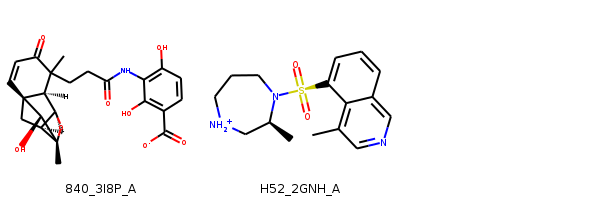

In [192]:
from rdkit.Chem import Draw
indices = [i for i,x in enumerate(rmsvs[50]) if x > 1000]
badms = [Draw.PrepareMolForDrawing(ms_noh[x],forceCoords=True) for x in indices]
legends = [ms[x].GetProp("_Name") for x in indices]
Draw.MolsToGridImage(badms,legends=legends)

I'm surprised that there were problems with the second structure (H52). It doesn't look like it should be that hard to embed, so that's something to look into.
The first structure (840) has multiple specified chiral centers in a highly constrained fused ring system, so it's not horribly surprising to encounter problems.

# Looking at RMSD values

In [145]:
def values_there(seq,threshold=1000):
    return [x for x in seq if x<threshold]

Let's look at histograms of RMS values

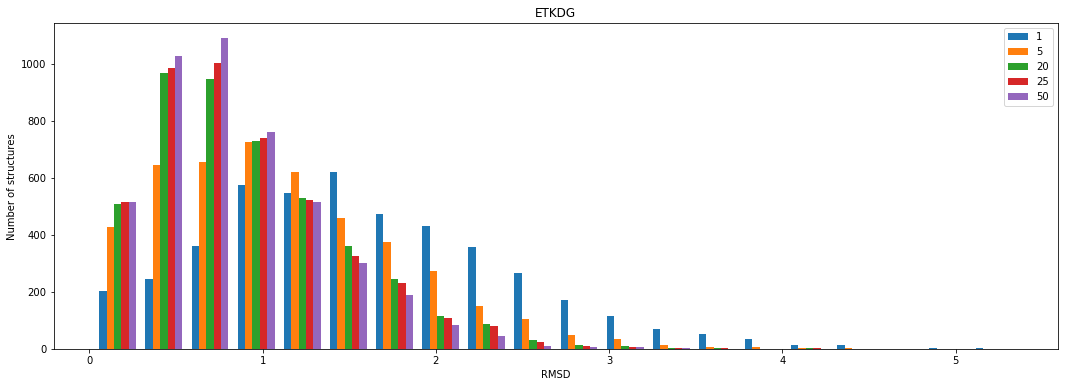

In [248]:
figsize(18,6)
hist([values_there(rmsvs[x]) for x in sorted(rmsvs)],bins=20,label=[x for x in sorted(rmsvs)]);
legend();
title('ETKDG');
xlabel('RMSD')
ylabel('Number of structures');

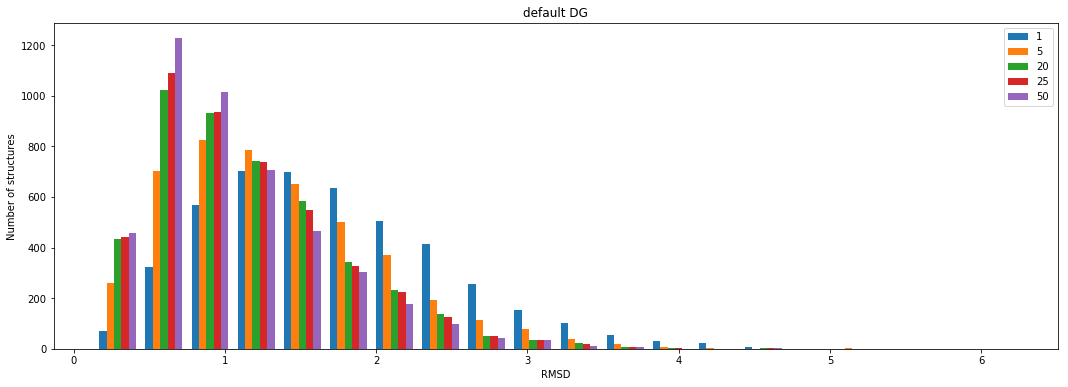

In [249]:
figsize(18,6)
hist([values_there(rmsvs2[x]) for x in sorted(rmsvs2)],bins=20,label=[x for x in sorted(rmsvs2)]);
legend();
title('default DG');
xlabel('RMSD')
ylabel('Number of structures');

Another way of looking at that is with cumulative box plots similar to what was used in Fig 7 of the ETKDG paper. These show the fraction of structures that have a minimum RMSD less than a particular value.

In [250]:
def fig7_plot(rmsvs,nmols,title,blocks=(0.1,0.5,1.0,1.5,2.0)):
    pltVals=[]
    for thresh in blocks:
        tVals = []
        for k in sorted(rmsvs):
            tVals.append(len([1 for x in rmsvs[k] if x<thresh])/nmols)
        pltVals.append(tVals)
    N = len(rmsvs.keys())
    ind = np.arange(N)
    w=0.1
    figsize(18,6)
    fig,ax = subplots()
    rects=[]
    for i,nc in enumerate(rmsvs):
        rects.append(ax.bar(ind+i*w,[x[i] for x in pltVals],w))
    ax.set_xticks(ind+(w*len(blocks)/2))
    ax.set_xticklabels('<%.2f'%x for x in blocks)
    ax.set_ylabel('Fraction of structures')
    ax.set_xlabel('RMSD')
    ax.set_title(title)
    ax.legend((r[0] for r in rects),('%d'%k for k in sorted(rmsvs)))
    ax.set_ybound(lower=0,upper=1)
    ax.grid(axis='y')


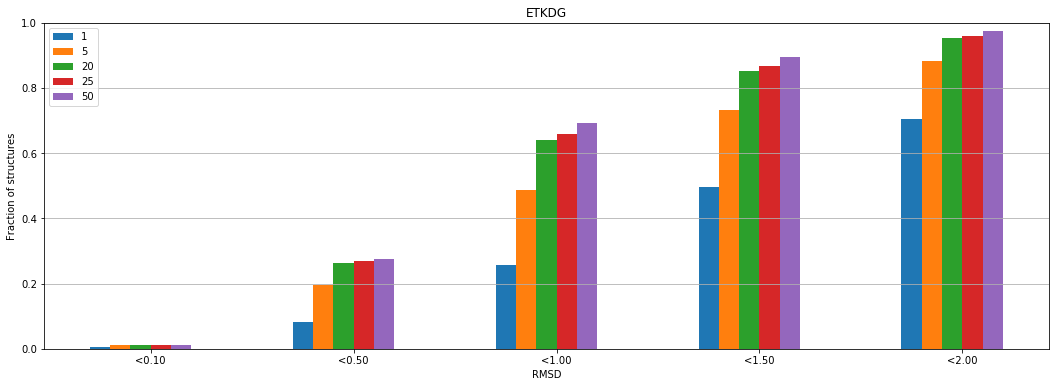

In [251]:
fig7_plot(rmsvs,len(ms),'ETKDG');

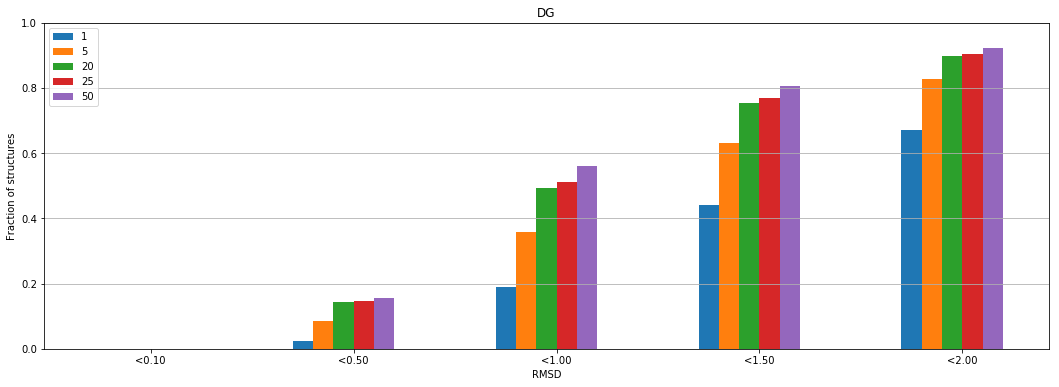

In [252]:
fig7_plot(rmsvs2,len(ms),'DG');

Those show what we'd expect: ETKDG is significantly better than DG and adding conformations tends to help. With 50 conformations ETKDG finds a result within 1.0A of the crystal structure for about 70% of the structures.

David Koes made some interesting plots that looked at average RMSD in structures as a function of the number of rotatable bonds. Let's try a few of those.

In [151]:
nrots = [AllChem.CalcNumRotatableBonds(x) for x in ms_noh]
rms_by_nrot = defaultdict(lambda:defaultdict(list))
rms_by_nrot2 = defaultdict(lambda:defaultdict(list))
for i,nrot in enumerate(nrots):
    for k in rmsvs:
        rms_by_nrot[k][nrot].append(rmsvs[k][i])
        rms_by_nrot2[k][nrot].append(rmsvs2[k][i])

In [152]:
import numpy as np
counts = sorted([(x,len(values_there(rms_by_nrot[50][x]))) for x in rms_by_nrot[50]])

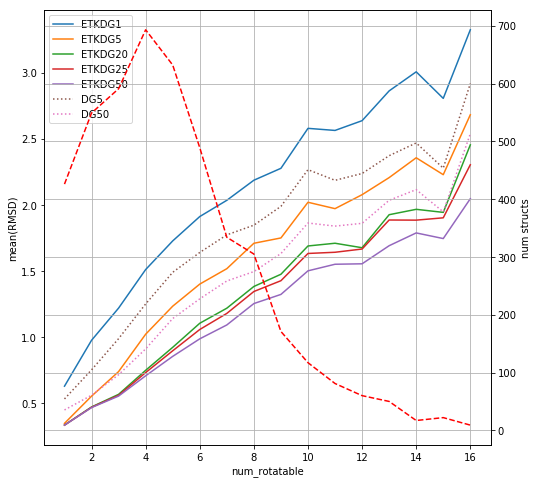

In [270]:
figsize(8,8)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# integral = [counts[0][1]]
# for i in range(1,len(counts)): 
#     integral.append(counts[i][1]+integral[-1])
# integral = [x/len(ms_noh) for x in integral]
# ax2.plot([x for x,y in counts],[y for y in integral],linestyle='--',color='r')
# ax2.set_ylabel('frac structs')

ax2.plot([x for x,y in counts],[y for x,y in counts],linestyle='--', color='r')
ax2.set_ylabel('num structs')

for k in sorted(rms_by_nrot):
    means = [(x,np.average(values_there(rms_by_nrot[k][x]))) for x,_ in counts]
    means = sorted(means)
    ax1.plot([x for x,y in means],[y for x,y in means],label="ETKDG"+str(k))
for k in (5,50):
    means = [(x,np.average(values_there(rms_by_nrot2[k][x]))) for x,_ in counts]
    means = sorted(means)
    ax1.plot([x for x,y in means],[y for x,y in means],linestyle=':',label="DG"+str(k))

ax1.set_ylabel('mean(RMSD)');
ax1.set_xlabel('num_rotatable')
ax1.legend();
ax2.grid(axis='y')
ax1.grid(axis='x')

I've deviated a bit from the way David presents this by adding a line showing the number of structures in the dataset with the corresponding number of rotatable bonds (the red dashed line and the right-hand Y axis). There aren't a lot of structures with more than 10 rotatable bonds in the dataset.

From the graph we can see the expected result: mean(RMSD) increases steadily with the number of rotatable bonds and ETKDG is consistently better than DG.

# Timing information

We know that the ETKDG procedure is more computationally intensive than DG. Let's look at how much of a difference it makes on this data set:

1.73472205238 0.0968224468535


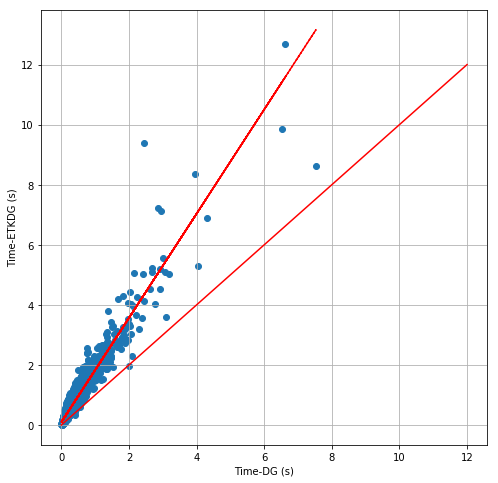

In [292]:
figsize(8,8)
ptimes = [x for i,x in enumerate(ts) if tms[i].GetNumConformers()]
ptimes2 = [x for i,x in enumerate(ts2) if tms[i].GetNumConformers()]
scatter(ptimes2,ptimes)
plot((0,12),(0,12),'r')
A = np.vstack([ptimes2, np.ones(len(ptimes2))]).T
m, c = np.linalg.lstsq(A, ptimes)[0]
print(m,c)
grid()
plot(ptimes2,m*np.array(ptimes2)+c,color='r',linestyle='--')             
xlabel('Time-DG (s)');
ylabel('Time-ETKDG (s)');

So ETKDG takes, on average, 1.7 times as long.

A different look at timing: The fraction of structures that are completed in less than given time.

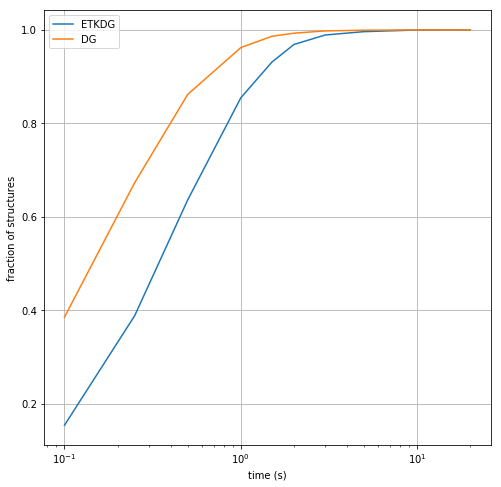

In [303]:
time_integration = defaultdict(int)
time_integration2 = defaultdict(int)
for tv in (0.1,.25, .5, 1, 1.5, 2, 3, 5,10,20):
    time_integration[tv] = len([1 for x in ts if x<=tv])
    time_integration2[tv] = len([1 for x in ts2 if x<=tv])
figsize(8,8)
plot(sorted(time_integration),[time_integration[x]/len(ms_noh) for x in sorted(time_integration)],label='ETKDG')
plot(sorted(time_integration),[time_integration2[x]/len(ms_noh) for x in sorted(time_integration)],label='DG')
grid()
xlabel('time (s)')
ylabel('fraction of structures')
legend()
xscale('log');

Interpretation of this: both ETKDG and DG are able to generate conformations (remember that the target number was 50 conformations with an RMS threshold of 0.5A between them) for >80% of the structures in less than 1 second. ETKDG completes ~85% and DG completes about 95%.

Look at how sensitive those times are to the number of rotatable bonds:

In [293]:
times_by_nrot = defaultdict(list)
times_by_nrot2 = defaultdict(list)
for i,nrot in enumerate(nrots):
    if not tms[i].GetNumConformers(): continue
    times_by_nrot[nrot].append(ts[i])
    times_by_nrot2[nrot].append(ts2[i])


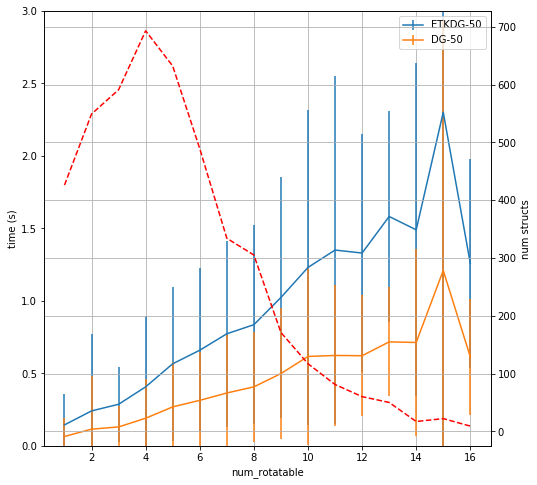

In [294]:
figsize(8,8)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.plot([x for x,y in counts],[y for x,y in counts],linestyle='--', color='r')
ax2.set_ylabel('num structs')

means = [(x,np.average(times_by_nrot[x]),np.std(times_by_nrot[x])) for x,_ in counts]
means = sorted(means)
ax1.errorbar([x for x,y,z in means],[y for x,y,z in means],yerr=[z for x,y,z in means],label="ETKDG-50")
means = [(x,np.average(times_by_nrot2[x]),np.std(times_by_nrot2[x])) for x,_ in counts]
means = sorted(means)
ax1.errorbar([x for x,y,z in means],[y for x,y,z in means],yerr=[z for x,y,z in means],label="DG-50")

ax1.set_ylabel('time (s)');
ax1.set_xlabel('num_rotatable')
ax1.legend();
ax2.grid(axis='y')
ax1.grid(axis='x')
ax1.set_ybound(0,3)

Adding rotatable bonds causes conformation generation to take longer. This isn't a huge surprise.

# Impact of force-field minimization

David also does an analysis of the impact of UFF minimization on the RMSD values. I'm not going to repeat exactly that, but it is worth seeing if minimizing the conformations improves the RMSDs. We'll do that here with UFF.

In [172]:
minms = [Chem.Mol(m) for m in tms]
mintimes = []
for i,m in enumerate(minms):
    t1 = time.time()
    if not m.GetNumConformers():
        continue
    AllChem.UFFOptimizeMoleculeConfs(m,numThreads=0)
    t2 = time.time()
    mintimes.append(t2-t1)
    if not i%500:
        print("Done:",i)

Done: 0


RDKit ERROR: [05:11:24] UFFTYPER: Unrecognized charge state for atom: 14


Done: 500


RDKit ERROR: [05:14:30] UFFTYPER: Unrecognized charge state for atom: 12


Done: 1000
Done: 1500


RDKit ERROR: [05:17:41] UFFTYPER: Unrecognized charge state for atom: 12
RDKit ERROR: [05:17:42] UFFTYPER: Unrecognized charge state for atom: 12
RDKit ERROR: [05:18:17] UFFTYPER: Unrecognized charge state for atom: 13
RDKit ERROR: [05:18:25] UFFTYPER: Unrecognized charge state for atom: 20


Done: 2000


RDKit ERROR: [05:19:47] UFFTYPER: Unrecognized charge state for atom: 21


Done: 2500


RDKit ERROR: [05:20:54] UFFTYPER: Unrecognized charge state for atom: 15
RDKit ERROR: [05:21:22] UFFTYPER: Unrecognized charge state for atom: 13
RDKit ERROR: [05:21:35] UFFTYPER: Unrecognized charge state for atom: 0


Done: 3000


RDKit ERROR: [05:22:47] UFFTYPER: Unrecognized charge state for atom: 29
RDKit ERROR: [05:22:47] UFFTYPER: Unrecognized charge state for atom: 31
RDKit ERROR: [05:22:48] UFFTYPER: Unrecognized charge state for atom: 31
RDKit ERROR: [05:23:23] UFFTYPER: Unrecognized charge state for atom: 13
RDKit ERROR: [05:24:08] UFFTYPER: Unrecognized charge state for atom: 24
RDKit ERROR: [05:24:24] UFFTYPER: Unrecognized charge state for atom: 12


Done: 3500


RDKit ERROR: [05:25:41] UFFTYPER: Unrecognized charge state for atom: 4
RDKit ERROR: [05:25:47] UFFTYPER: Unrecognized charge state for atom: 7


Done: 4000


RDKit ERROR: [05:26:56] UFFTYPER: Unrecognized charge state for atom: 13
RDKit ERROR: [05:27:20] UFFTYPER: Unrecognized charge state for atom: 12


Done: 4500


In [173]:
minms_noh = [Chem.RemoveHs(m) for m in minms]

In [174]:
with open('../data/platinum_dataset_2017_01.chiral_confs.minimized.pkl','wb+') as outf:
    pickle.dump((minms_noh,mintimes),outf)

In [175]:
rmsvs_min = defaultdict(list)
for m,tm in zip(ms_noh,minms_noh):
    best = 1e8
    cids = [x.GetId() for x in tm.GetConformers()]
    for i,cid in enumerate(cids):
        rms = AllChem.GetBestRMS(m,tm,probeConfId=cid)
        best = min(rms,best)
        if not i:
            best_1 = best
        if i<5:
            best_5 = best
        if i<20:
            best_20 = best
        if i<25:
            best_25 = best
    rmsvs_min[50].append(best)
    rmsvs_min[1].append(best_1)
    rmsvs_min[5].append(best_5)
    rmsvs_min[20].append(best_20)
    rmsvs_min[25].append(best_25)

In [176]:
rms_by_nrot_min = defaultdict(lambda:defaultdict(list))
for i,nrot in enumerate(nrots):
    for k in rmsvs_min:
        rms_by_nrot_min[k][nrot].append(rmsvs_min[k][i])


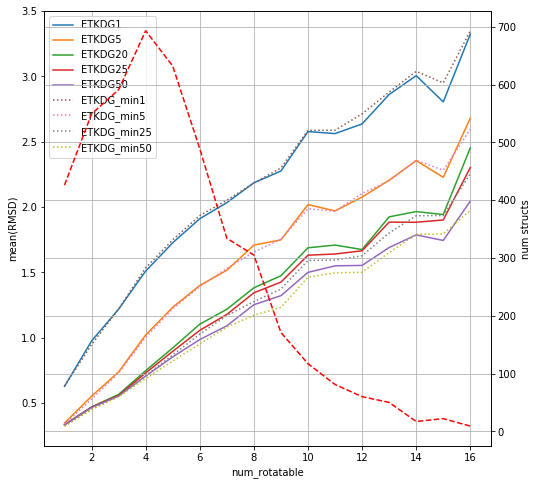

In [304]:
figsize(8,8)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot([x for x,y in counts],[y for x,y in counts],linestyle='--', color='r')
ax2.set_ylabel('num structs')

for k in sorted(rms_by_nrot):
    means = [(x,np.average(values_there(rms_by_nrot[k][x]))) for x,_ in counts]
    means = sorted(means)
    ax1.plot([x for x,y in means],[y for x,y in means],label="ETKDG"+str(k))
for k in (1,5,25,50):
    means = [(x,np.average(values_there(rms_by_nrot_min[k][x]))) for x,_ in counts]
    means = sorted(means)
    ax1.plot([x for x,y in means],[y for x,y in means],linestyle=':',label="ETKDG_min"+str(k))

ax1.set_ylabel('mean(RMSD)');
ax1.set_xlabel('num_rotatable')
ax1.legend();
ax2.grid(axis='y')
ax1.grid(axis='x')

The impact is not large.

There's a lot more to be looked at here with the force fields, but this blog post is already getting fairly long, so I'm going to come back to that in a future post.